In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from visanalysis.util import general_utils as gu
from visanalysis.plugin.twentyfourhourfitness import TwentyFourHourDataObject
from ballrig_analysis.utils import plot_tools as pt

In [13]:
def create_behavior_epoch_response_matrix(fictrac_data_table, data_name='rel_vec_world_z', velocity=False, velocity_window_size=10, velocity_outlier_threshold=300):
    timestamps = []
    traces = []
    n_epochs = len(fictrac_data_table)
    for e in range(n_epochs):
        epoch_fictrac_data = fictrac_data_table[e]
        epoch_timestamps = epoch_fictrac_data['timestamps']
        epoch_trace = epoch_fictrac_data['data'][data_name]
        
        if data_name == 'rel_vec_world_z':
            epoch_trace = np.unwrap(epoch_trace)

        if velocity:
            epoch_trace, epoch_timestamps = ftu.get_velocity(epoch_trace, epoch_timestamps, window_size=velocity_window_size, outlier_threshold=velocity_outlier_threshold)

        timestamps.append(epoch_timestamps)
        traces.append(epoch_trace)
        
    ts_standard, xs_standardized = gu.align_traces_to_standardized_timestamp(timestamps, traces, ts_standard=None, trim=False, min_time=None, max_time=None)
    
    if not velocity:
        idx_t0 = np.where(np.isclose(ts_standard, 0))[0][0]
        xs_standardized -= xs_standardized[:,idx_t0].reshape(-1, 1)
    
    return ts_standard, xs_standardized.reshape(1, *xs_standardized.shape)

def plot_trial_averages(x, mean_response, sem_response, unique_parameter_values, vlines=[], x_label='Time [s]', invert_x_axis=False, title=None, fig_name=None, velocity=False, ax=None):

    # Generate plot
    if ax is None:
        ax_initialized_here = True
        fig, ax = plt.subplots(1, 1, squeeze=True, sharey=True)
    else:
        ax_initialized_here = False
    for v in vlines:
        ax.axvline(v, color='k', linestyle='dashed', linewidth=1)
    ax.axhline(0, color='k', linestyle='solid', linewidth=1)
    pt.plot_w_error(y=np.rad2deg(mean_response[0]), x=x, ye=np.rad2deg(sem_response[0]), 
                    xlabel=x_label, ylabel='rel_vec_world_z' if velocity else 'rel_vec_world_z',
                    #xlabel=x_label, ylabel='Heading velocity [$^\circ$/s]' if velocity else 'Integrated Heading [$^\circ$]', 
                    # xlim=[-run_params['pre_time'], run_params['stim_time']+run_params['tail_time']],
                    legend=[str(x) for x in unique_parameter_values], show_legend=True, 
                    title=title, ax=ax)
    if invert_x_axis:
        ax.invert_xaxis()

#     if fig_name is not None and ax_initialized_here:
#         savefig(fig_name, fig)


In [3]:
# 'integrated_heading'
# 'rel_vec_world_z'

In [14]:
date = '2023-08-28'
date_path = os.path.join('/oak/stanford/groups/trc/data/yandan/2023behavior/import', date)
stimpack_hdf_path = os.path.join(date_path, date + '.hdf5')
print(stimpack_hdf_path)



/oak/stanford/groups/trc/data/yandan/2023behavior/import/2023-08-28/2023-08-28.hdf5


In [33]:
series_data = TwentyFourHourDataObject(file_path=stimpack_hdf_path, series_number=3, quiet=False)

In [34]:
stimulus_timing = series_data.getStimulusTiming()
stimulus_start_times = stimulus_timing['stimulus_start_times']

In [35]:
fictrac_data_for_epoch = series_data.getBehaviorData(stimulus_timing=stimulus_timing)

In [36]:
len(fictrac_data_for_epoch)

180

In [37]:
ts_standard, epoch_behavior_matrix = create_behavior_epoch_response_matrix(fictrac_data_for_epoch,
                                                                          'rel_vec_world_z',
                                                                          velocity=False,
                                                                          velocity_window_size=10,
                                                                          velocity_outlier_threshold=300)

In [38]:
separated_params = {
    'position': []
}

In [39]:
# get trial averages
unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus = series_data.getTrialAverages(
                                                                                            epoch_behavior_matrix, 
                                                                                            parameter_key=separated_params, 
                                                                                            replace_parameter_value={}, 
                                                                                            min_samples=50)

In [40]:
# vlines = [-1, 0, 1, 3]

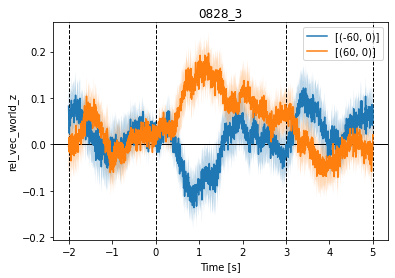

In [41]:
vlines = [-2, 0, 3, 5]
x_label = 'Time [s]'
invert_x_axis = False
plot_title = '0828_3'
fig_name = 'test'
velocity = False
ax = None

plot_trial_averages(ts_standard, mean_response, sem_response, unique_parameter_values, vlines, x_label=x_label, invert_x_axis=invert_x_axis, 
                    title=plot_title, fig_name=fig_name, velocity=velocity, ax=ax)
save_file = os.path.join(date_path, 'figs', '20230828_3_av')
plt.savefig(save_file,dpi=300,bbox_inches="tight",transparent=False)
plt.show()

In [11]:
save_file = os.path.join(dataset_path, 'figs', '20230614')

[[]]